In [161]:
#Importing the libraries
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
data = pd.read_csv(r'C:\Users\Rohit\Desktop\train_oSwQCTC\train.csv') #lets load the dataset

In [163]:
#lets take a peek at the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [164]:
data.drop(['User_ID'],axis=1,inplace=True)#User ID is of no use to us
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [165]:
#we have some categorical data which cannot be processed by our algorithms so lets encode them
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.Gender = le.fit_transform(data['Gender'])
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [166]:
data.Age = le.fit_transform(data.Age)

In [167]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [168]:
#I am doing the same label encoding for City_category and Stay_in_current_city_Years as well
data.City_Category = le.fit_transform(data.City_Category)
data.Stay_In_Current_City_Years = le.fit_transform(data.Stay_In_Current_City_Years)
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969


In [169]:
#lets see how many different products are there in the Product_ID column
data['Product_ID'].nunique()

3631

In [170]:
le.fit(data['Product_ID'])#label encode the Product_ID turns out this is the most important feature
data['Product_ID']=le.transform(data['Product_ID'])
data['Product_ID'] = 10*data.Product_ID/data['Product_ID'].max()
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1.851240,0,0,10,0,2,0,3,NaN,NaN,8370
1,6.545455,0,0,10,0,2,0,1,6.0,14.0,15200
2,2.347107,0,0,10,0,2,0,12,NaN,NaN,1422
3,2.280992,0,0,10,0,2,0,12,14.0,NaN,1057
4,7.531680,1,6,16,2,4,0,8,NaN,NaN,7969


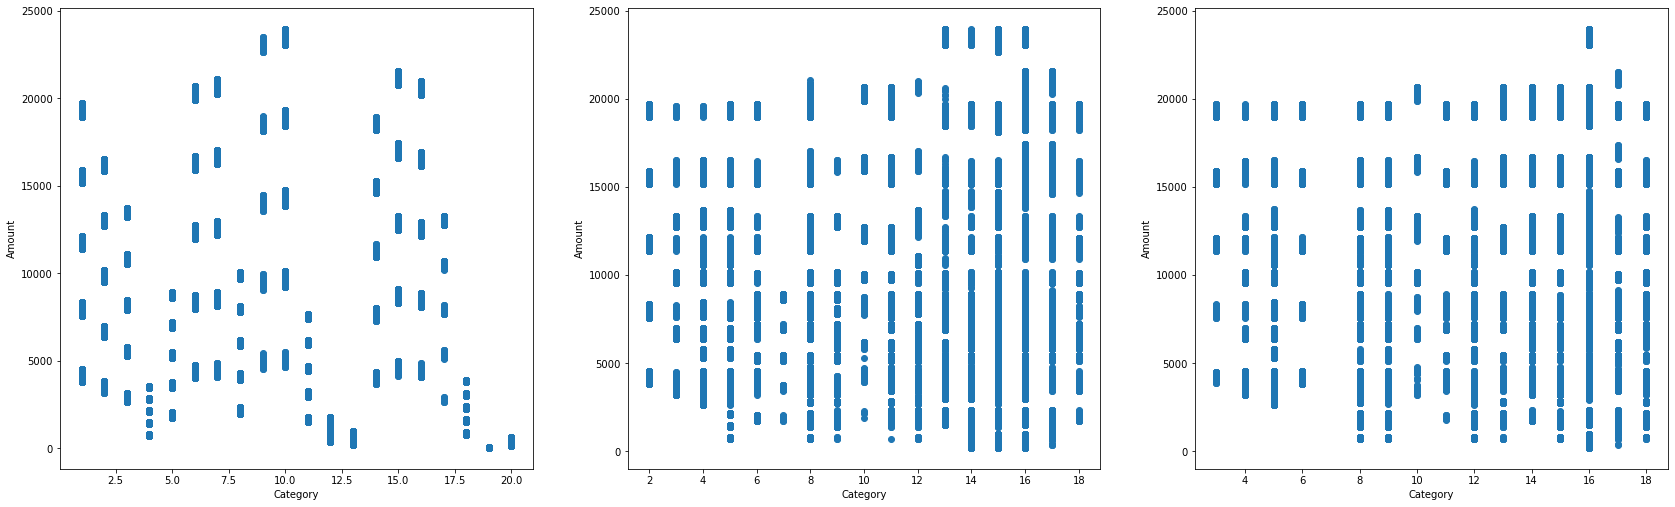

In [171]:
#lets plot the product category vs purchase graphs
plt.figure(figsize=(100,100))
plt.subplot(10,10,1)
plt.xlabel('Category')
plt.ylabel('Amount')
plt.plot(data.Product_Category_1,data.Purchase,'o')

plt.subplot(10,10,2)
plt.xlabel('Category')
plt.ylabel('Amount')
plt.plot(data.Product_Category_2,data.Purchase,'o')

plt.subplot(10,10,3)
plt.xlabel('Category')
plt.ylabel('Amount')
plt.plot(data.Product_Category_3,data.Purchase,'o')

plt.show()

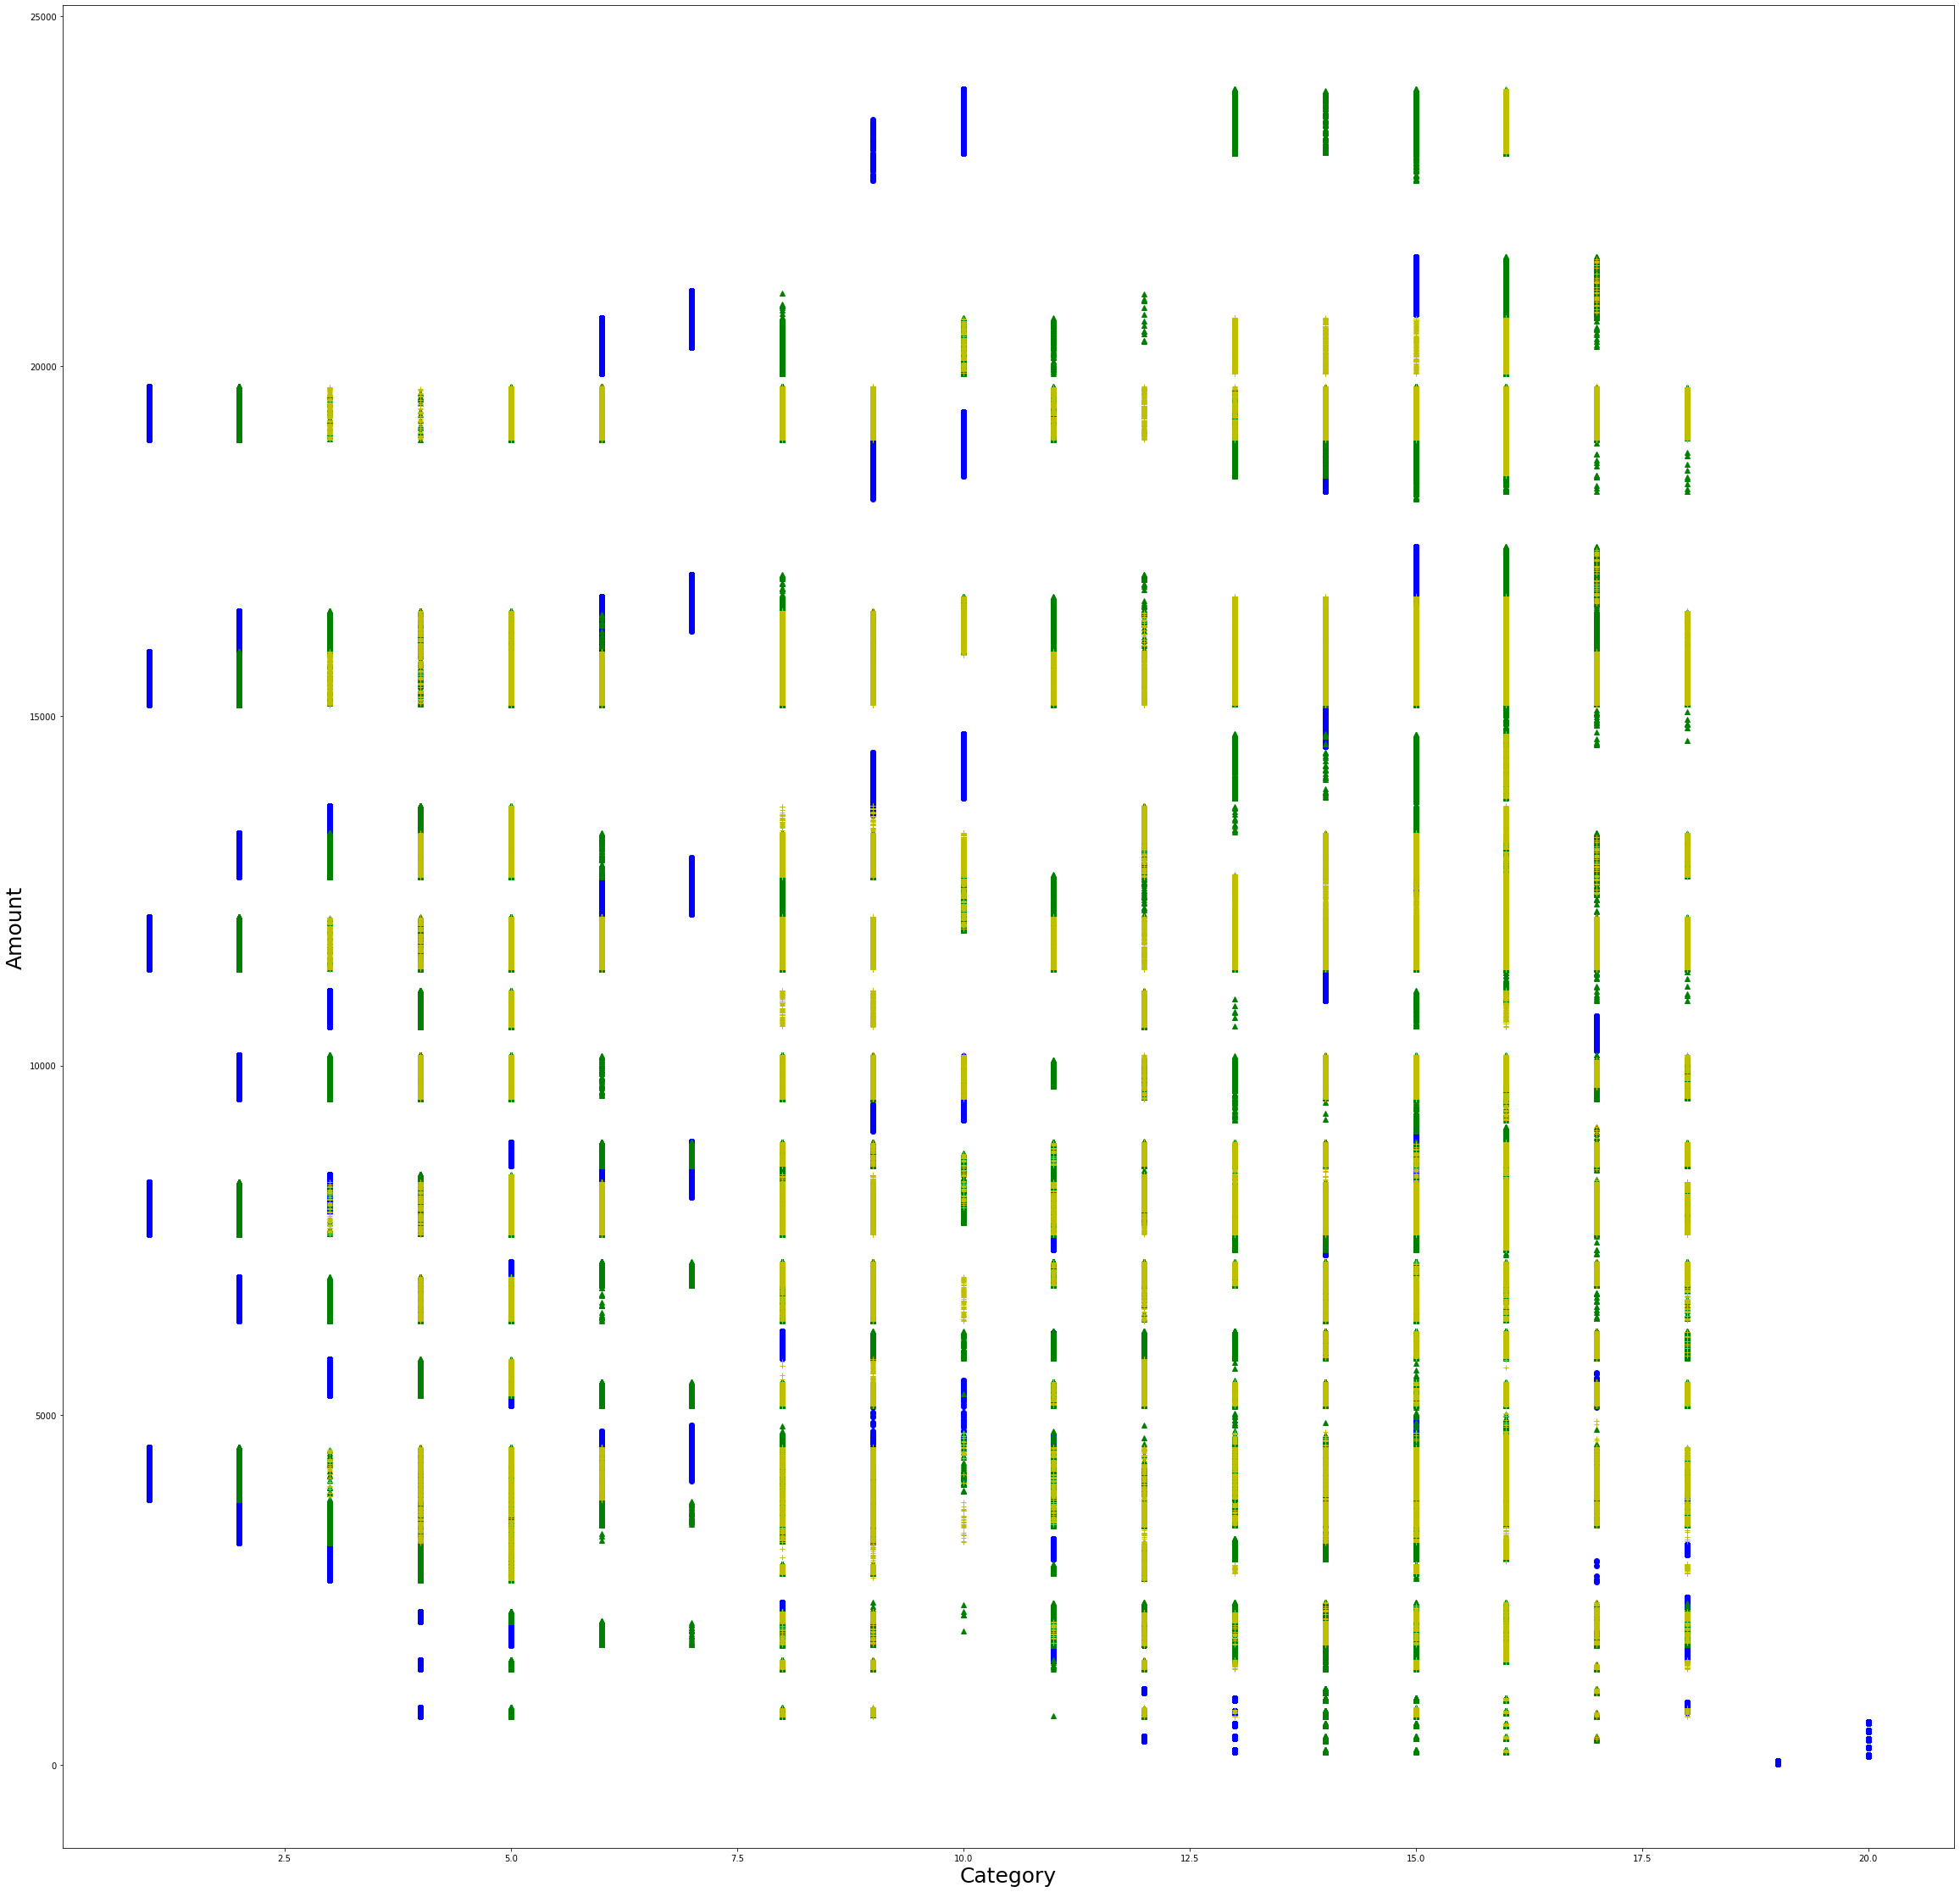

In [172]:
plt.figure(figsize=(40,40))#combining the above three plots
plt.xlabel('Category',fontsize=25)
plt.ylabel('Amount',fontsize=25)
plt.plot(data.Product_Category_1,data.Purchase,'ob')
plt.plot(data.Product_Category_2,data.Purchase,'^g')
plt.plot(data.Product_Category_3,data.Purchase,'+y')
plt.show()

Seeing the plots for category vs purchase, it seems there is no relation in the product category and purchase, so lets drop it

In [173]:
#Filling the missing values with 0 (there is no product Category with 0  label)
data[['Product_Category_1','Product_Category_2','Product_Category_3']]= data[['Product_Category_1','Product_Category_2','Product_Category_3']].fillna(0)

In [174]:
#Now lets split the data
features=data.drop(['Purchase'],axis=1)
target=data['Purchase']
print(len(features))#I have 550068 rows in the dataset 10% of the data is more than sufficient for testing

550068


In [175]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.1, random_state=42)

In [176]:
from sklearn.preprocessing import StandardScaler#Scaling the features
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [177]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [178]:
from sklearn.feature_selection import SelectPercentile , f_regression#selecting better half ofthe features 
                                                                    # by individually inspecting their effect
ftr_sel = SelectPercentile(f_regression,percentile = 50)
x_train = ftr_sel.fit_transform(x_train,y_train)
x_test = ftr_sel.transform(x_test)

C:\Users\Rohit\.conda\envs\tf\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


This marks the end of our preprocessing. Now, we will move towards the model.

In [179]:
#I am using a Random Forest Regressor which after many iterations gives the best performance
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(min_samples_split = 100)
reg.fit(x_train,y_train)

C:\Users\Rohit\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(min_samples_split=100)

In [180]:
acc = reg.score(x_test,y_test)
acc

0.7159718271475488

In [181]:
#I will use r2 score as my evaluation metric
from sklearn.metrics import r2_score ,mean_squared_error
pred=scaler_y.inverse_transform(reg.predict(x_test))
r2 = r2_score(scaler_y.inverse_transform(y_test),pred)
r2

0.7159718271475489

In [182]:
#adjusted r-squared score
n=len(x_test)
k=x_test.shape[1]
r_adj = 1-((1-r2)*(n-1)/(n-k-1))
r_adj

0.7159460068740219

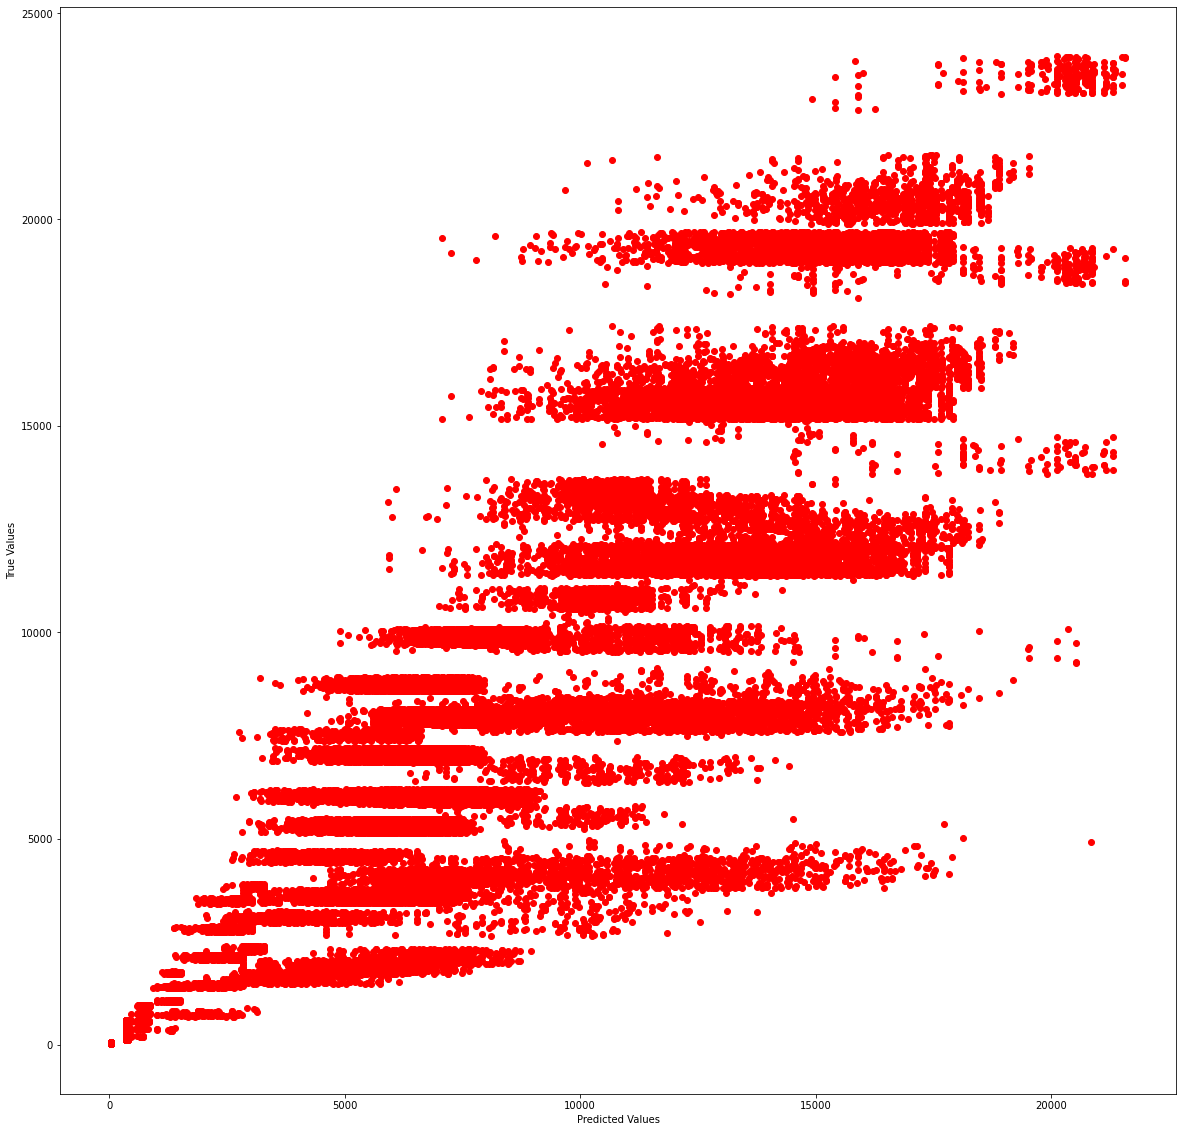

In [183]:
plt.figure(figsize=(20,20))
plt.plot(pred,scaler_y.inverse_transform(y_test),'or')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [184]:
rmse = mean_squared_error(scaler_y.inverse_transform(y_test),pred,squared=False)
rmse

2670.0365102893647

In [185]:
pred_train= scaler_y.inverse_transform(reg.predict(x_train))#to make sure we are not overfitting
rmse_train = mean_squared_error(scaler_y.inverse_transform(y_train),pred_train,squared=False)
rmse_train

2624.9712433094624